C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3777 - loss: 1.6962 - val_accuracy: 0.5532 - val_loss: 1.2579
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5866 - loss: 1.1703 - val_accuracy: 0.6267 - val_loss: 1.0691
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6411 - loss: 1.0375 - val_accuracy: 0.6325 - val_loss: 1.0461
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6666 - loss: 0.9525 - val_accuracy: 0.6534 - val_loss: 0.9953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6883 - loss: 0.8857 - val_accuracy: 0.6670 - val_loss: 0.9531
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7054 - loss: 0.8392 - val_accuracy: 0.6783 - val_loss: 0.9450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7295 - loss: 0.7759 - val_accuracy: 0.6886 - val_loss: 0.9032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7391 -

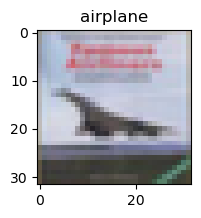

Actual: airplane
Predicted: airplane
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.83      0.76      0.79      1000
           2       0.65      0.49      0.56      1000
           3       0.48      0.56      0.52      1000
           4       0.68      0.55      0.61      1000
           5       0.64      0.55      0.59      1000
           6       0.65      0.87      0.74      1000
           7       0.78      0.71      0.74      1000
           8       0.78      0.80      0.79      1000
           9       0.70      0.85      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize (very important!)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names
classes = ["airplane", "automobile", "bird", "cat", "deer", 
           "dog", "frog", "horse", "ship", "truck"]

# Plot sample image
def plot_sample(x, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.title(classes[int(y[index])])
    plt.show()

# Define CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

# Train the model
cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Predict
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Flatten y_test
y_test = y_test.reshape(-1,)

# Show a sample prediction
plot_sample(x_test, y_test, 3)
print(f"Actual: {classes[y_test[3]]}")
print(f"Predicted: {classes[y_pred_classes[3]]}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))
